# PyEEM - Fluorescence Excitation-Emission Matrix (EEM) Spectroscopy
# *User Tutorial*
## Load the PyEEM library and display version

In [1]:
import pyeem
print(pyeem.__version__)

1.0.5


## Check out the supported instruments

In [2]:
pyeem.instruments.supported

name
manufacturer supported_models              
Agilent      Cary 4E                cary_4e
             Cary Eclipse      cary_eclipse
Horiba       Aqualog-880-C          aqualog
             SPEX Fluorolog-3     fluorolog

## Check out the demo datasets

In [3]:
demos_df = pyeem.datasets.demos
display(demos_df)
demos_df[demos_df["demo_name"] == "rutherford"]["description"].item()

,demo_name,description,citation,DOI,absorbance_instrument,water_raman_instrument,EEM_instrument
0,rutherford,Excitation Emission Matrix (EEM) fluorescence ...,"Rutherford, Jay W., et al. ""Excitation emissio...",10.1016/j.atmosenv.2019.117065,Aqualog,None,Aqualog
1,drEEM,The demo dataset contains measurements made du...,"Murphy, Kathleen R., et al. ""Fluorescence spec...",10.1039/c3ay41160e,Cary 4E,Fluorolog,Fluorolog


'Excitation Emission Matrix (EEM) fluorescence spectra used for combustion generated particulate matter source identification using a neural network.'

## Download the Rutherford et al. demo dataset from S3
- Please note that this step requires an internet connection because the data is downloaded from an AWS S3 bucket.

In [4]:
demo_data_dir = pyeem.datasets.download_demo(
    "demo_data", demo_name="rutherford"
)

Download Demo Dataset from S3: 239it [00:00, 349.24it/s]


## Load the dataset

In [5]:
"""
demo_data_dir = "demo_data/qinmin"
dataset = pyeem.datasets.Load(
    data_dir=demo_data_dir,
    raman_instrument=None,
    absorbance_instrument="cary_4e",
    eem_instrument="cary_eclipse",
    mode="w"
)
display(dataset.meta_df)
"""

"""
demo_data_dir = "demo_data/drEEM"
dataset = pyeem.datasets.Load(
    data_dir=demo_data_dir,
    raman_instrument="fluorolog",
    absorbance_instrument="cary_4e",
    eem_instrument="fluorolog",
    mode="w"
)
display(dataset.meta_df)
"""

demo_data_dir = "demo_data/rutherford"
cal_sources = {"cigarette": "ug/ml", "diesel": "ug/ml", "wood_smoke": "ug/ml"}
dataset = pyeem.datasets.Load(
    data_dir=demo_data_dir,
    raman_instrument=None,
    absorbance_instrument="aqualog",
    eem_instrument="aqualog",
    calibration_sources=cal_sources,
    mode="w"
)

## Let's checkout the metadata
- The metadata contains information about collected sample sets which are composed of a few different scan types. Allowable scan types include:
    - blank_eem 
    - water_raman 
    - sample_eem 
    - absorb

In [6]:
display(dataset.meta_df.head())

datetime_utc         filename collected_by  \
sample_set scan_type                                                      
1          blank_eem  2020-07-01 10:29:05   blank_eem1.csv           JR   
           sample_eem 2020-07-01 10:29:06  sample_eem1.csv           JR   
           sample_eem 2020-07-01 10:29:07  sample_eem2.csv           JR   
           sample_eem 2020-07-01 10:29:08  sample_eem3.csv           JR   
           sample_eem 2020-07-01 10:29:09  sample_eem4.csv           JR   

                                             description  \
sample_set scan_type                                       
1          blank_eem            Spectroscopy Grade Blank   
           sample_eem                            Diesel1   
           sample_eem                            Diesel2   
           sample_eem                            Diesel3   
           sample_eem  Cigarette from Cookstove Lab Hood   

                                                                comments  \
sample_set scan_type                                                       
1          blank_eem   Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   

                       dilution  Raman_Area  cigarette  diesel  wood_smoke  \
sample_set scan_type                                                         
1          blank_eem        1.0   2040.3794       0.00     0.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.77     0.0         0.0   

                       calibration_sample  prototypical_sample  test_sample  \
sample_set scan_type                                                          
1          blank_eem                False                False        False   
           sample_eem                True                False         True   
           sample_eem                True                 True        False   
           sample_eem                True                False         True   
           sample_eem                True                False         True   

                      original_date  \
sample_set scan_type                  
1          blank_eem     2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   

                                                                filepath  \
sample_set scan_type                                                       
1          blank_eem   /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   

                              name prototypical_source test_sources  \
sample_set scan_type                                                  
1          blank_eem    blank_eem1                               []   
           sample_eem  sample_eem1              diesel           []   
           sample_eem  sample_eem2              diesel           []   
           sample_eem  sample_eem3              diesel           []   
           sample_eem  sample_eem4           cigarette           []   

                                            hdf_path  
sample_set scan_type                                  
1          blank_eem    raw_sampl

## Checkout the metadata summary information

In [7]:
dataset.metadata_summary_info()

,Date Range,Number of Sample Sets,Number of blank EEMs,Number of sample EEMs,Number of water raman scans,Number of absorbance scans
0,"(Timestamp('2020-07-01 10:29:05'), Timestamp('...",14,20,107,0,107


## Create a preprocessing routine
- The demo dataset contains raw scans, in order to analyze and interpret this data, we must first apply several preprocessing steps.

In [8]:
routine_df = pyeem.preprocessing.create_routine(
    crop = True,
    discrete_wavelengths = False,
    gaussian_smoothing = False,
    blank_subtraction = True,
    inner_filter_effect = True,
    raman_normalization = True,
    scatter_removal = True,
    dilution = False,
)

display(routine_df)

,step_name,hdf_path
step_order,,
0,raw,raw_sample_sets/
1,crop,preprocessing/filters/crop
2,blank_subtraction,preprocessing/corrections/blank_subtraction
3,inner_filter_effect,preprocessing/corrections/inner_filter_effect
4,raman_normalization,preprocessing/corrections/raman_normalization
5,scatter_removal,preprocessing/corrections/scatter_removal
6,complete,preprocessing/complete/


## Execute the preprocessing routine
- Each preprocessing step has certain knobs and dials you can tune to have them run to your liking. It is worth checking the documentation to learn more about these customizations.
- Please note that depending on the steps and settings you've chosen as well as your dataset's size, the time it takes for this step to complete will vary.

In [9]:
crop_dimensions = {"emission_bounds": (246, 573), "excitation_bounds": (224, float("inf"))}
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    crop_dims=crop_dimensions,
    raman_source_type = "metadata",
    fill="interp",
    progress_bar=True
)
routine_results_df

Preprocessing scan sets: 100%|██████████| 14/14 [01:42<00:00,  7.33s/it]


step_completed  \
sample_set scan_type  name        step_name                            
1          blank_eem  blank_eem1  raw                           True   
                                  crop                          True   
           sample_eem sample_eem1 raw                           True   
                                  crop                          True   
                                  blank_subtraction             True   
...                                                              ...   
16         sample_eem sample_eem1 raman_normalization           True   
                                  scatter_removal               True   
                                  complete                      True   
17         blank_eem  blank_eem1  raw                           True   
                                  crop                          True   

                                                      step_exception  \
sample_set scan_type  name        step_name                            
1          blank_eem  blank_eem1  raw                           None   
                                  crop                          None   
           sample_eem sample_eem1 raw                           None   
                                  crop                          None   
                                  blank_subtraction             None   
...                                                              ...   
16         sample_eem sample_eem1 raman_normalization           None   
                                  scatter_removal               None   
                                  complete                      None   
17         blank_eem  blank_eem1  raw                           None   
                                  crop                          None   

                                                                                                hdf_path  \
sample_set scan_type  name        step_name                                                                
1          blank_eem  blank_eem1  raw                                       raw_sample_sets/1/blank_eem1   
                                  crop                           preprocessing/filters/crop/1/blank_eem1   
           sample_eem sample_eem1 raw                                      raw_sample_sets/1/sample_eem1   
                                  crop                          preprocessing/filters/crop/1/sample_eem1   
                                  blank_subtraction    preprocessing/corrections/blank_subtraction/1/...   
...                                                                                                  ...   
16         sample_eem sample_eem1 raman_normalization  preprocessing/corrections/raman_normalization/...   
                                  scatter_removal      preprocessing/corrections/scatter_removal/16/s...   
                                  complete                         preprocessing/complete/16/sample_eem1   
17         blank_eem  blank_eem1  raw                                      raw_sample_sets/17/blank_eem1   
                                  crop                          preprocessing/filters/crop/17/blank_eem1   

                                                               units  
sample_set scan_type  name        step_name                           
1          blank_eem  blank_eem1  raw                  Intensity, AU  
                                  crop                 Intensity, AU  
           sample_eem sample_eem1 raw                  Intensity, AU  
                                  crop                 Intensity, AU  
                                  blank_subtraction    Intensity, AU  
...                                                              ...  
16         sample_eem sample_eem1 raman_normalization  Intensity, RU  
                                  scatter_removal      Intensity, RU  
                                  complete             Intensity,

## Check to see if any of the steps failed to complete
- If you are using a demo dataset, you should see an empty dataframe.

In [10]:
display(routine_results_df[routine_results_df["step_exception"].notna()])

,,,,step_completed,step_exception,hdf_path,units
sample_set,scan_type,name,step_name,,,,


## Visualize the preprocessing steps

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from celluloid import Camera
import matplotlib.ticker as ticker


from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorbar(mappable, units, cbar_kws={}):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    
    cbar_ax_size = cbar_kws.get("cbar_ax_size", "8%")
    cbar_ax_pad = cbar_kws.get("cbar_ax_pad", 0.05)
    cax = divider.append_axes("right", size=cbar_ax_size, pad=cbar_ax_pad)
    cbar = fig.colorbar(mappable, cax=cax)
    
    cbar_tick_params_labelsize = cbar_kws.get("cbar_tick_params_labelsize", 11)
    cbar.ax.tick_params(labelsize=cbar_tick_params_labelsize)
    cbar.formatter.set_powerlimits((-2, 3))
    plt.sca(last_axes)
    
    cbar_label_size = cbar_kws.get("cbar_label_size", 12)
    cbar_labelpad = cbar_kws.get("cbar_labelpad", 5)
    cbar.set_label(units, size=cbar_label_size, labelpad=cbar_labelpad)
    return cbar


def _eem_contour(eem, ax, intensity_units, include_cbar, plot_kws={}, cbar_kws={}, **kwargs):
    # Set the default plot kws
    # contourf doesn't take aspect as a kwarg...
    # so we have to remove it and pass it seperately 
    # via set_aspect(). Clunky but oh well.
    default_aspect = "equal"
    aspect = plot_kws.get("aspect", default_aspect)
    contour_kws = plot_kws.copy()
    contour_kws.pop("aspect", None)
    default_contour_kws = dict()
    contour_kws = dict(default_contour_kws, **contour_kws)

    fl = eem.to_numpy()
    excitation = eem.columns.to_numpy()
    emission = eem.index.to_numpy()

    hmap = ax.contourf(
        excitation,
        emission,
        fl,
        **contour_kws
    )
    ax.set_aspect(aspect)
    
    if include_cbar:
        cbar = colorbar(hmap, units=intensity_units, cbar_kws=cbar_kws)
    
    return hmap


def _eem_imshow(eem, ax, intensity_units, include_cbar, plot_kws={}, cbar_kws={}, **kwargs):
    excitation = eem.columns.to_numpy()
    emission = eem.index.to_numpy()
    default_plot_kws = dict(
        origin = "lower",
        extent = [excitation[0], excitation[-1], emission[0], emission[-1]],
        aspect = "equal"
    )
    plot_kws = dict(default_plot_kws, **plot_kws)

    hmap = ax.imshow(eem, **plot_kws)
    if include_cbar:
        cbar = colorbar(hmap, intensity_units, cbar_kws=cbar_kws)
    return hmap


def _eem_surface_contour(eem, ax, intensity_units, include_cbar, plot_type="surface", 
                         surface_plot_kws={}, contour_kws={}, cbar_kws={}, **kwargs):
    excitation = eem.columns.to_numpy()
    emission = eem.index.to_numpy()
    fl = eem.to_numpy()
    excitation, emission = np.meshgrid(excitation, emission)

    hmap = ax.plot_surface(
        excitation, emission, fl, rstride=1, cstride=1, alpha=0.75, 
        cmap="viridis", shade=False, **surface_plot_kws
    )
    zlim_min = kwargs.get("zlim_min", fl.min())
    zlim_max = kwargs.get("zlim_max", fl.max())
    z_offset = zlim_max*-2

    if plot_type == "surface_contour":
        ax.contourf(excitation, emission, fl, zdir="z", offset=z_offset, 
                         vmin=zlim_min, vmax=zlim_max, **contour_kws)
        zlim_min += z_offset

    ax.set_zlim(zlim_min, zlim_max)
    ax.zaxis.set_ticks_position('none') 
    ax.set_zticks([])
    
    elev = kwargs.get("elev", 20)
    azim = kwargs.get("azim", 135)
    ax.view_init(elev=elev, azim=azim)
    ax.xaxis.pane.set_edgecolor("grey")
    ax.yaxis.pane.set_edgecolor("grey")
    ax.zaxis.pane.set_edgecolor("grey")
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    title = kwargs.get("title", "Excitation Emission Matrix")
    title_fontsize = kwargs.get("title_fontsize", 14)
    title_fontweight = kwargs.get("title_fontweight", "bold")
    title_pad = kwargs.get("pad", 0)
    ax.set_title(title, wrap=True, fontsize=title_fontsize, fontweight=title_fontweight, pad=title_pad)

    wavelength_units = kwargs.get("wavelength_units", "nm")
    xlabel = kwargs.get("xlabel", "Excitation " + r"$\lambda$, %s" % str(wavelength_units))
    ylabel = kwargs.get("ylabel", "Emission " + r"$\lambda$, %s" % str(wavelength_units))
    axis_label_fontsize = kwargs.get("axis_label_fontsize", 12)
    axis_labelpad = kwargs.get("axis_labelpad", 5)
    ax.set_xlabel(xlabel, fontsize=axis_label_fontsize, labelpad=axis_labelpad)
    ax.set_ylabel(ylabel, fontsize=axis_label_fontsize, labelpad=axis_labelpad)
    
    tick_params_labelsize = kwargs.get("tick_params_labelsize", 10)
    ax.tick_params(axis="both", which="major", pad=0, labelsize=tick_params_labelsize)
    
    xaxis_major_maxnlocator = kwargs.get("xaxis_major_maxnlocator", 4)
    yaxis_major_maxnlocator = kwargs.get("yaxis_major_maxnlocator", 4)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(xaxis_major_maxnlocator))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(yaxis_major_maxnlocator))
    
    if include_cbar:
        shrink = cbar_kws.get("shrink", 0.5)
        label_size = cbar_kws.get("size", 12)
        tick_params_labelsize = kwargs.get("labelsize", 11)
        cbar = plt.colorbar(hmap, ax=ax, shrink=shrink)
        cbar.set_label(intensity_units, size=label_size)
        cbar.ax.ticklabel_format(style="scientific", scilimits=(-2,3), useMathText=True)
        cbar.ax.tick_params(labelsize=tick_params_labelsize)
    
    return hmap


def eem_plot(eem_df, ax=None, plot_type="imshow", intensity_units="unspecified", wavelength_units="nm",
              aspect="equal", include_cbar=True, fig_kws={}, plot_kws={}, cbar_kws={}, **kwargs):
    
    # Set the default figure kws
    default_fig_kws = dict()
    fig_kws = dict(default_fig_kws, **fig_kws)
    
    if ax is None:
        projection = None
        if plot_type == "surface_contour":
            projection="3d"
        fig = plt.figure(**fig_kws)
        ax = plt.gca(projection=projection)
    
    if plot_type == "contour":
        hmap = _eem_contour(eem_df, ax, intensity_units, include_cbar,
                            plot_kws=plot_kws, cbar_kws=cbar_kws, **kwargs)
        
    elif plot_type == "imshow":
        hmap = _eem_imshow(eem_df, ax, intensity_units, include_cbar, 
                           plot_kws=plot_kws, cbar_kws=cbar_kws, **kwargs)
    
    elif plot_type in ["surface", "surface_contour"]:
        hmap = _eem_surface_contour(eem_df, ax, intensity_units, include_cbar,
                                    plot_type=plot_type, **kwargs)
        return hmap
    
    else:
        raise ValueError("plot_type must be imshow, contour, or surface_contour")
    

    tick_params_labelsize = kwargs.get("tick_params_labelsize", 11)
    ax.tick_params(axis="both", which="major", labelsize=tick_params_labelsize)
    
    title = kwargs.get("title", "Excitation Emission Matrix")
    title_wrap = kwargs.get("title_wrap", True)
    title_fontsize = kwargs.get("title_fontsize", 14)
    title_pad = kwargs.get("title_pad", 20)
    fontweight = kwargs.get("title_fontweight", "bold")
    ax.set_title(title, wrap=title_wrap, fontsize=title_fontsize, fontweight=fontweight, pad=title_pad)

    xlabel = kwargs.get("xlabel", "Excitation " + r"$\lambda$, %s" % str(wavelength_units))
    ylabel = kwargs.get("ylabel", "Emission " + r"$\lambda$, %s" % str(wavelength_units))
    axis_label_fontsize = kwargs.get("axis_label_fontsize", 12)
    axis_labelpad = kwargs.get("axis_labelpad", 5)
    ax.set_xlabel(xlabel, fontsize=axis_label_fontsize, labelpad=axis_labelpad)
    ax.set_ylabel(ylabel, fontsize=axis_label_fontsize, labelpad=axis_labelpad)
    return hmap


def _get_subplot_dims(n):
    ncols = 4
    if n % ncols:
        nplots = n + (ncols - n % ncols)
    else:
        nplots = n

    nrows = int(nplots / ncols)
    return nrows, ncols


def plot_preprocessing(
    dataset, routine_results_df, sample_set, sample_name=None, include_complete=False, plot_type="imshow",
    fig=None, fig_kws={}, plot_kws={}, cbar_kws={}, **kwargs
):
    rr_df = routine_results_df.copy()
    if not include_complete:
        if "complete" in rr_df.index.get_level_values("step_name"):
            rr_df.drop("complete", level="step_name", inplace=True)
    
    rr_df = rr_df[rr_df["step_completed"].fillna(False)]
    blank_steps_dict = {}
    scan_set = rr_df.xs(sample_set, level="sample_set", drop_level=False)    
    
    if "blank_eem" in scan_set.index.get_level_values("scan_type"):
        blank = scan_set.xs("blank_eem", level="scan_type")
        for step_name in blank.index.get_level_values("step_name"):
            units = blank.xs(step_name, level="step_name")["units"].unique().item()
            hdf_path = blank.xs(step_name, level="step_name")["hdf_path"].unique().item()
            title = "Blank: {0}".format(step_name.replace("_", " ").title())
            blank_steps_dict[title] = {
                "units": units,
                "eem_df": pd.read_hdf(dataset.hdf, key=hdf_path)
            }
    
    sample_steps_dict = {}
    if "sample_eem" in scan_set.index.get_level_values("scan_type") and sample_name in scan_set.index.get_level_values("name"):
        sample = scan_set.xs(("sample_eem", sample_name), level=["scan_type", "name"])
        for step_name in sample.index.get_level_values("step_name"):
            units = sample.xs(step_name, level="step_name")["units"].unique().item()
            hdf_path = (
                sample.xs(step_name, level="step_name")["hdf_path"].unique().item()
            )
            title = "Sample: {0}".format(step_name.replace("_", " ").title())
            sample_steps_dict[title] = {
                "units": units,
                "eem_df": pd.read_hdf(dataset.hdf, key=hdf_path)                
            }

    steps_spectra_dict = {**blank_steps_dict, **sample_steps_dict}
    
    nsteps = len(steps_spectra_dict.keys())
    nrows, ncols = _get_subplot_dims(nsteps)
    nplots = nrows * ncols
            
    # Set the fig_kws as a mapping of default and kwargs
    default_fig_kws = dict(
        tight_layout={"h_pad":5, "w_pad":0.05},
        figsize=(ncols ** 2, nrows * ncols)
    )
    # Set the fig_kws
    fig_kws = dict(default_fig_kws, **fig_kws)
    fig = plt.figure(**fig_kws)    

    projection = None
    if plot_type in ["surface", "surface_contour"]:
        projection="3d"
        
    axes = []
    for i in range(1, ncols*nrows+1):
        ax = fig.add_subplot(nrows, ncols, i, projection=projection)
        axes.append(ax)
        
    suptitle = "Results of Preprocessing Routine - Sample Set #{0}\nSample name: {1}".format(
        sample_set, sample_name
    )
    suptitle = kwargs.get('suptitle', suptitle)
    suptitle_fontsize = kwargs.get('suptitle_fontsize', 20)
    fig.suptitle(suptitle, fontsize=suptitle_fontsize, y=1.05)
    
    for i in range(nsteps, nplots):
        axes[i].axis("off")
        axes[i].set_visible(False)
        #axes[i].remove()

    ax_idx = 0
    for title, step_dict in steps_spectra_dict.items():
        units = step_dict["units"]
        eem_df = step_dict["eem_df"]
        eem_plot(eem_df, intensity_units=units, ax=axes[ax_idx],
                 plot_type=plot_type, plot_kws=plot_kws, cbar_kws=cbar_kws, title=title, **kwargs)
        ax_idx += 1

    pad = kwargs.get("tight_layout_pad", 1.08)
    h_pad = kwargs.get("tight_layout_hpad", None)
    w_pad = kwargs.get("tight_layout_wpad", None)
    rect = kwargs.get("tight_layout_rect", None)
    if plot_type in ["surface", "surface_contour"]:
        w_pad = kwargs.get("tight_layout_wpad", 25)
        h_pad = kwargs.get("tight_layout_hpad", 15)
    plt.tight_layout(pad=pad, h_pad=h_pad, w_pad=w_pad, rect=rect)

    return axes

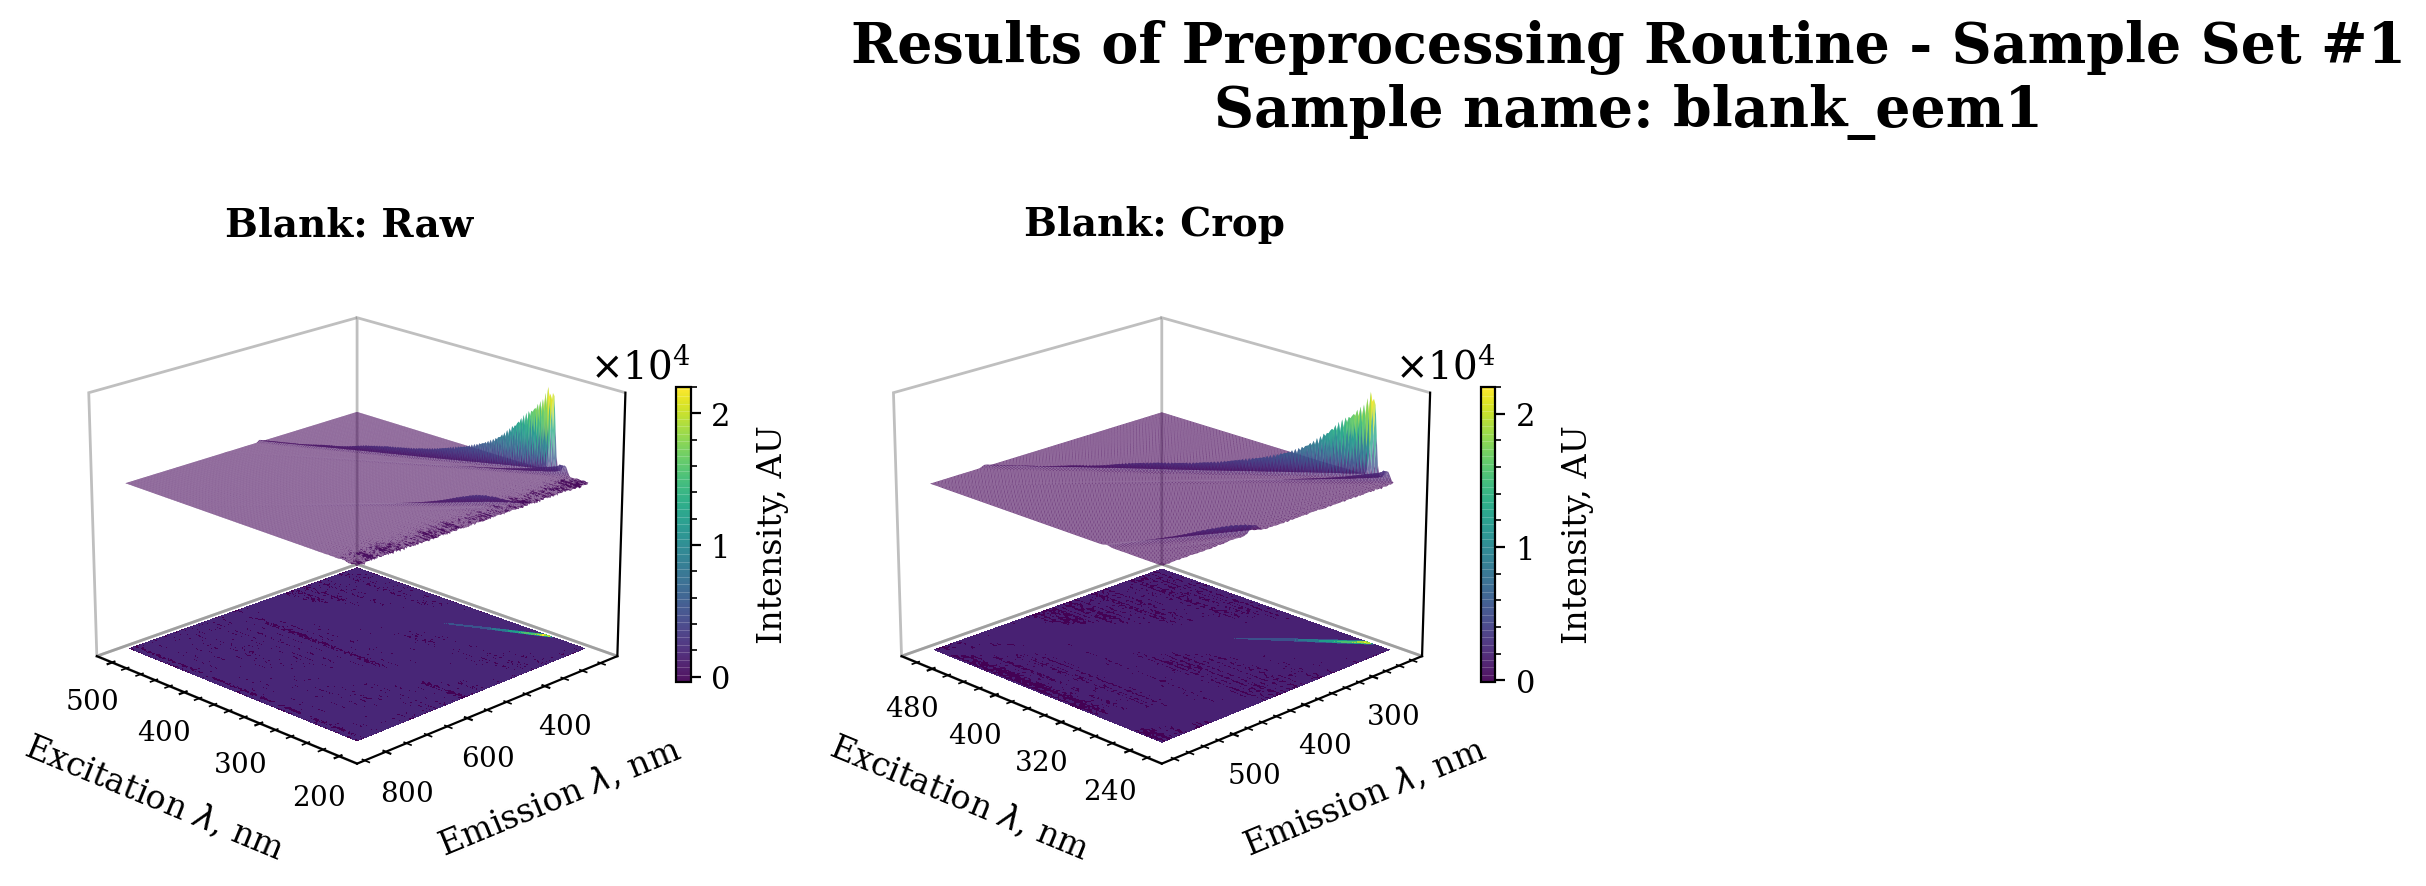

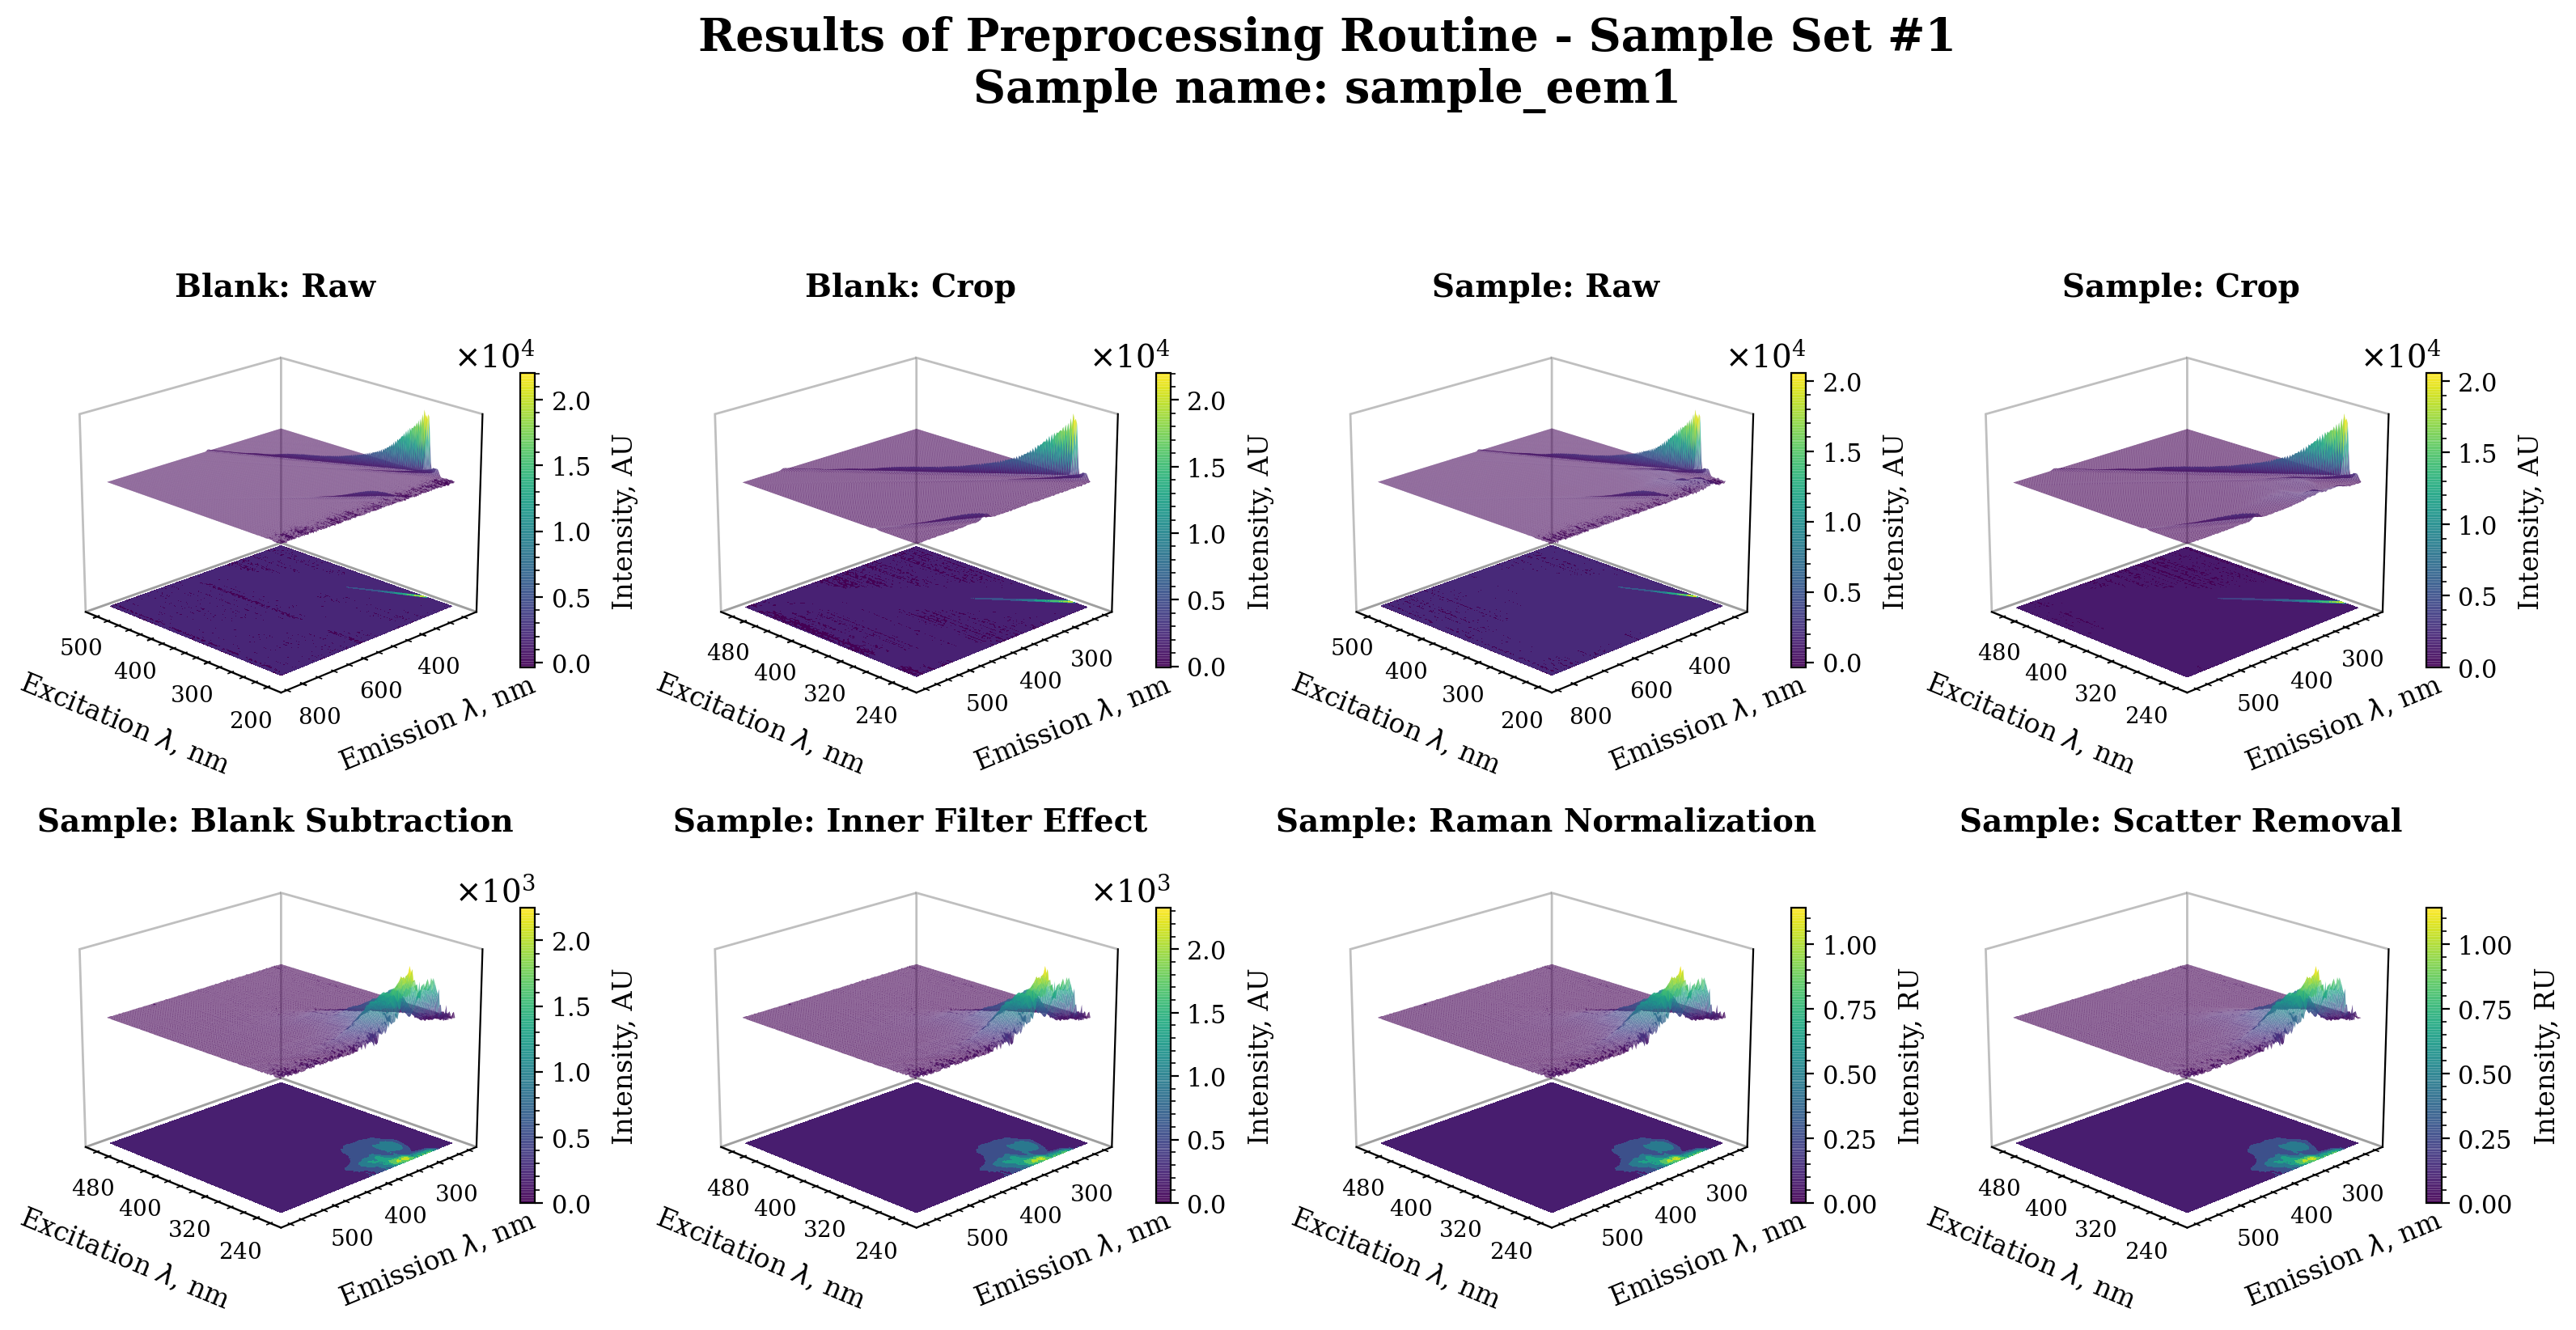

In [20]:
i = 0
for name, group in routine_results_df.groupby(level=["sample_set", "name"]):
    sample_set = name[0]
    sample_name = name[1]
    kwargs = {}
    axes = pyeem.plots.plot_preprocessing(
        dataset,
        routine_results_df,
        sample_set=sample_set,
        sample_name=sample_name,
        plot_type="surface_contour",
        fig_kws={"dpi": 200},
    )
    plt.show()
    i += 1
    if i == 2:
        break

## Load the calibration information

In [21]:
cal_df = pyeem.preprocessing.calibration(dataset, routine_results_df)
display(cal_df)

concentration  \
source     source_units intensity_units measurement_units        slope       intercept    r_squared                  
cigarette  ug/ml        Intensity, RU   Integrated Intensity, RU 2532.409217 -620.162018  0.929928            0.77   
                                                                                          0.929928            5.00   
                                                                                          0.929928            5.00   
                                                                                          0.929928            5.00   
                                                                                          0.929928            5.00   
...                                                                                                            ...   
wood_smoke ug/ml        Intensity, RU   Integrated Intensity, RU 4860.709872 -1572.345781 0.460195            0.50   
                                                                                          0.460195            0.50   
                                                                                          0.460195            2.00   
                                                                                          0.460195            1.00   
                                                                                          0.460195            5.00   

                                                                                                     integrated_intensity  \
source     source_units intensity_units measurement_units        slope       intercept    r_squared                         
cigarette  ug/ml        Intensity, RU   Integrated Intensity, RU 2532.409217 -620.162018  0.929928            1605.582491   
                                                                                          0.929928           11369.642711   
                                                                                          0.929928            9937.219073   
                                                                                          0.929928           14786.022223   
                                                                                          0.929928           14005.964492   
...                                                                                                                   ...   
wood_smoke ug/ml        Intensity, RU   Integrated Intensity, RU 4860.709872 -1572.345781 0.460195            2654.533537   
                                                                                          0.460195             856.330949   
                                                                                          0.460195            3413.400549   
                                                                                          0.460195            1719.608567   
                                                                                          0.460195           23200.187472   

                                                                                                     prototypical_sample  \
source     source_units intensity_units measurement_units        slope       intercept    r_squared                        
cigarette  ug/ml        Intensity, RU   Integrated Intensity, RU 2532.409217 -620.162018  0.929928                 False   
                                                                                          0.929928                  True   
                                                                                          0.929928                  True   
                                                                                          0.929928                 False   
                                                                                          0.929928                 False   
...                                                                     

## Checkout the calibration summary information

In [22]:
cal_summary_df = pyeem.preprocessing.calibration_summary_info(cal_df)
display(cal_summary_df)

,source,source_units,intensity_units,measurement_units,slope,intercept,r_squared,Number of Samples,Min. Concentration,Max. Concentration
0,cigarette,ug/ml,"Intensity, RU","Integrated Intensity, RU",2532.409217,-620.162018,0.929928,26.0,29.0,26.0
1,diesel,ug/ml,"Intensity, RU","Integrated Intensity, RU",196.524691,-208.308515,0.687330,0.2,0.2,0.2
2,wood_smoke,ug/ml,"Intensity, RU","Integrated Intensity, RU",4860.709872,-1572.345781,0.460195,5.0,10.0,5.0


## Plot the calibration curves

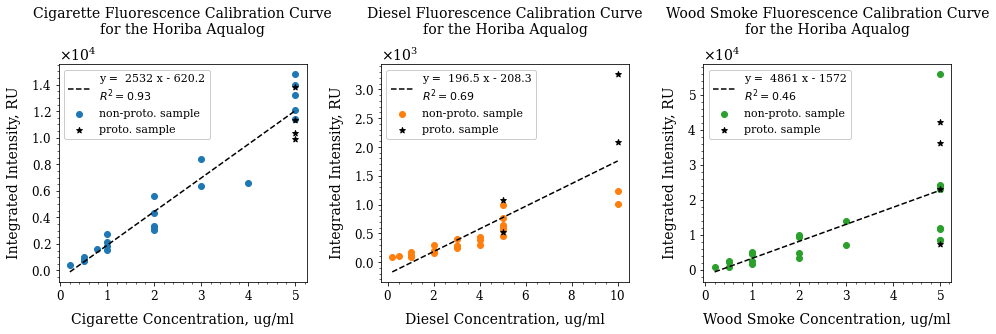

In [23]:
def plot_calibration_curves(dataset, cal_df, subplots=False, fig_kwargs={}, plot_kwargs={}, **kwargs):
    colors = plt.rcParams["axes.prop_cycle"]()
    sources = cal_df.index.get_level_values(level="source").unique()

    # TODO - Just put all subplots on one row
    nsources = sources.nunique()
    nrows, ncols = _get_subplot_dims(nsources)
    nplots = nrows * ncols
    fig, axes = plt.subplots(1, nsources, figsize=(ncols ** 2, nrows * ncols))
    
    def _get_regression_metric(source_df, metric):
        return source_df.index.get_level_values(level=metric).unique().item()

    ax_idx = 0
    lines = []
    labels = []
    for source in sources:
        c = next(colors)["color"]
        source_df = cal_df.xs(source, level="source")
        source_units = _get_regression_metric(source_df, "source_units")
        measurement_units = _get_regression_metric(source_df, "measurement_units")
        slope = _get_regression_metric(source_df, "slope")
        y_intercept = _get_regression_metric(source_df, "intercept")
        r_squared = _get_regression_metric(source_df, "r_squared")

        cal_poly = np.poly1d([slope, y_intercept])

        proto_spectra_df = source_df[source_df["prototypical_sample"]]
        non_proto_spectra_df = source_df[~source_df["prototypical_sample"]]


        p_x = proto_spectra_df["concentration"].values
        p_y = proto_spectra_df["integrated_intensity"].values
        np_x = non_proto_spectra_df["concentration"].values
        np_y = non_proto_spectra_df["integrated_intensity"].values
        axes.flat[ax_idx].scatter(np_x, np_y, label="non-proto. sample", color=c)
        axes.flat[ax_idx].scatter(
            p_x, p_y, label="proto. sample", marker="*", color="black"
        )
        
        x = np.linspace(source_df["concentration"].min(),
                        source_df["concentration"].max())
        axes.flat[ax_idx].plot(
            x,
            cal_poly(x),
            label="y = %s\n$R^2=%.2f$" % (str(cal_poly).replace("\n", ""), r_squared),
            color="black",
            linestyle="--"
        )

        formatted_source_str = source.replace("_", " ").title()
        xlabel_str = "%s Concentration, %s" % (formatted_source_str, source_units)
        axes.flat[ax_idx].set_xlabel(xlabel_str, fontsize=14)
        axes.flat[ax_idx].set_ylabel(measurement_units, fontsize=14)
        axes.flat[ax_idx].tick_params(axis="both", which="major", labelsize=12)
        axes.flat[ax_idx].set_title(
            "%s Fluorescence Calibration Curve\nfor the %s %s"
            % (
                formatted_source_str,
                dataset.instruments_df.eem.item().manufacturer,
                dataset.instruments_df.eem.item().name.title(),
            ),
            pad=30,
            fontsize=14,
        )
        ax_line, ax_label = axes.flat[ax_idx].get_legend_handles_labels()
        lines.extend(ax_line)
        labels.extend(ax_label)
        axes.flat[ax_idx].legend(loc="upper left", fontsize=11)
        ax_idx += 1
    
    hspace = kwargs.get("subplot_hspace", 0)
    wspace = kwargs.get("subplot_wspace", 0.3)
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    return axes

axes = pyeem.plots.plot_calibration_curves(dataset, cal_df)
plt.show()

## Create prototypical spectra and then plot them

In [24]:
import itertools
import os
import random

import numpy as np
import pandas as pd

def prototypical_spectrum(dataset, source_df, aug_steps_df):
    """Weighted average of calibration spectra with randomly
    assigned weights between 0 and 1.

    Args:
        source_name (str): [description]
        source_df (~pandas.DataFrame): [description]
        cal_df (~pandas.DataFrame): [description]
        hdf (pandas.io.pytables.HDFStore): [description]

    Raises:
        Exception: [description]

    Returns:
        DataFrame: [description]
    """

    source_name = source_df.index.get_level_values("source").unique().item()
    source_units = source_df.index.get_level_values("source_units").unique().item()
    intensity_units = source_df.index.get_level_values("intensity_units").unique().item()
    
    proto_eems = []
    for index, row in source_df.iterrows():
        eem_path = row["hdf_path"]
        eem = pd.read_hdf(dataset.hdf, key=eem_path)
        proto_eems.append(eem)

    proto_concentration = source_df[source_df["prototypical_sample"]][
        "concentration"
    ].mean()

    weights = []
    for i in range(len(proto_eems)):
        weights.append(random.uniform(0, 1))

    proto_eem = np.average([eem.values for eem in proto_eems], axis=0, weights=weights)

    proto_eem = pd.DataFrame(
        data=proto_eem, index=proto_eems[0].index, columns=proto_eems[0].columns
    )
    proto_eem.index.name = "emission_wavelength"

    hdf_path = aug_steps_df[aug_steps_df["step_name"] == "prototypical"][
        "hdf_path"
    ].item()
    hdf_path = os.path.join(hdf_path, source_name)

    new_indices = np.array(["source", "proto_conc", "source_units", "intensity_units", "hdf_path"])
    proto_eem = proto_eem.assign(
        **{
            "source": source_name,
            "proto_conc": proto_concentration,
            "source_units": source_units,
            "intensity_units": intensity_units,
            "hdf_path": hdf_path,
        }
    )
    proto_eem.set_index(new_indices.tolist(), append=True, inplace=True)
    new_indices = np.append(new_indices, ("emission_wavelength"))
    proto_eem = proto_eem.reorder_levels(new_indices)
    proto_eem.to_hdf(dataset.hdf, key=hdf_path)
    return proto_eem

def _get_steps():
    hdf_subdir = "augmentation/"
    steps = {"step_name": ["prototypical", "single_sources", "mixtures"]}
    steps_df = pd.DataFrame(steps)
    steps_df["hdf_path"] = hdf_subdir + steps_df["step_name"]
    # Impose order on the augmentation steps:
    steps_df["step_name"] = pd.Categorical(
        steps_df["step_name"], ["prototypical", "single_sources", "mixtures"],
    )
    steps_df.sort_values("step_name", inplace=True, ignore_index=True)
    return steps_df

def create_prototypical_spectra(dataset, cal_df, **kwargs):
    aug_steps_df = _get_steps()

    results_rows = []
    for source_name, group in cal_df.groupby(level="source", as_index=False):
        proto_eem_df = prototypical_spectrum(dataset, group, aug_steps_df)
        new_indices = proto_eem_df.index.droplevel("emission_wavelength").unique()
        result = dict(zip(list(new_indices.names), list(new_indices.item())))
        results_rows.append(result)

    results_df = pd.DataFrame(results_rows)
    results_index = "source"
    results_df.set_index(results_index, inplace=True)
    return results_df

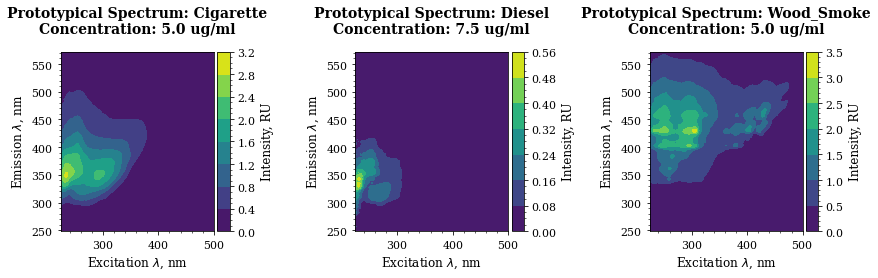

In [25]:
proto_results_df = pyeem.augmentation.create_prototypical_spectra(dataset, cal_df)
axes = pyeem.plots.plot_prototypical_spectra(
    dataset, proto_results_df, plot_type="contour"
)
plt.show()

## Augmented Spectra - Single Sources
### Create augmented single source spectra by scaling each prototypical spectrum across a range of concentrations

In [27]:
ss_results_df = pyeem.augmentation.create_single_source_spectra(
    dataset, cal_df, conc_range=(0, 5), num_spectra=100
)

100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


## Plot the augmented single source spectra

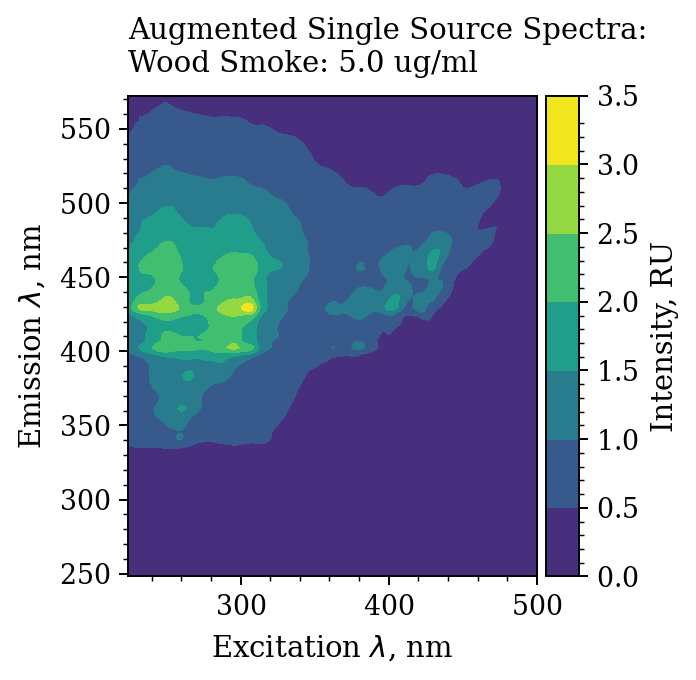

In [29]:
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
source = "wood_smoke"
anim = pyeem.plots.single_source_animation(
    dataset,
    ss_results_df,
    source=source,
    plot_type="contour",
    fig_kws={"dpi": 175},
    animate_kwargs={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())
#anim.save('%s.mp4' % source, dpi=175)

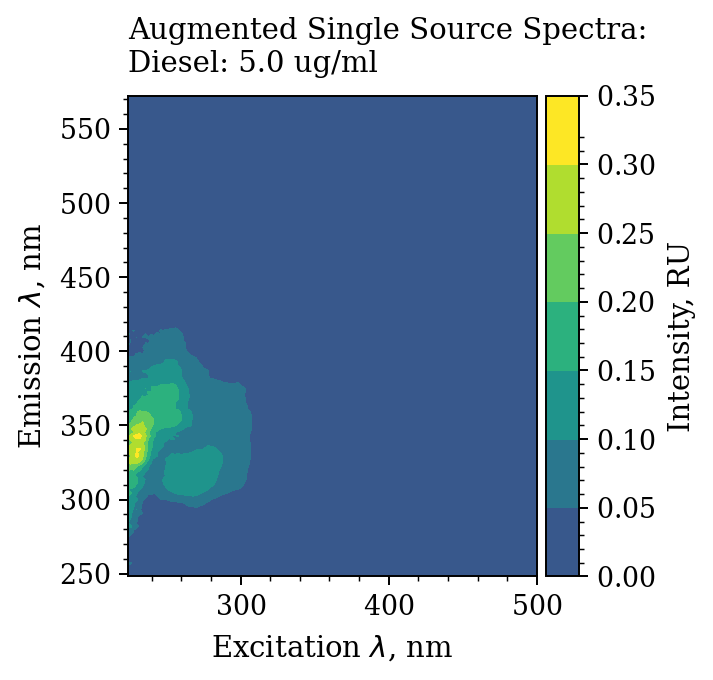

In [30]:
source = "diesel"
anim = pyeem.plots.single_source_animation(
    dataset,
    ss_results_df,
    source=source,
    plot_type="contour",
    fig_kws={"dpi": 175},
    animate_kwargs={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())
#anim.save('%s.mp4' % source, dpi=175)

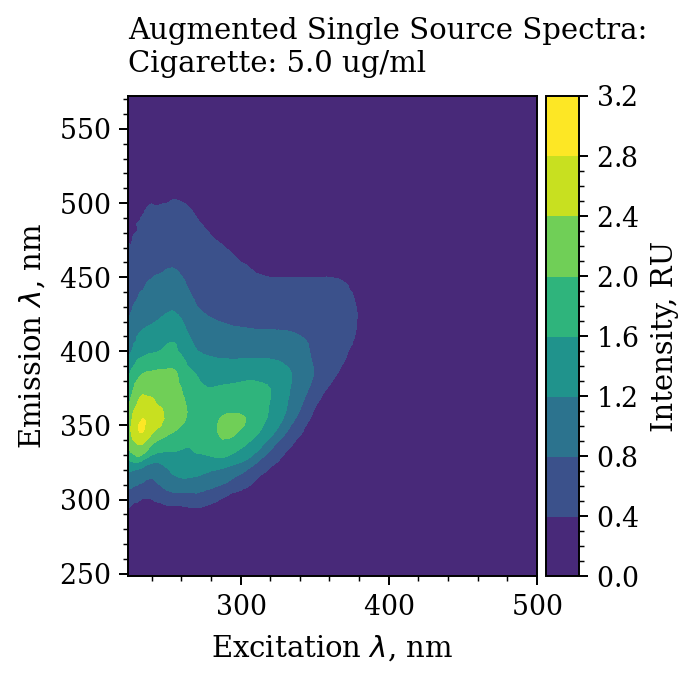

In [31]:
source = "cigarette"
anim = pyeem.plots.single_source_animation(
    dataset,
    ss_results_df,
    source=source,
    plot_type="contour",
    fig_kws={"dpi": 175},
    animate_kwargs={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())
#anim.save('%s.mp4' % source, dpi=175)

## Augmented Spectra - Mixtures
### Create augmented mixture spectra by scaling and combining the prototypical spectra across a range of concentrations

In [33]:
mix_results_df = pyeem.augmentation.create_mixtures(
    dataset, cal_df, conc_range=(0.01, 6.3), num_steps=5
)

Creating Augmented Mixtures: 100%|██████████| 125/125 [00:02<00:00, 43.21it/s]


## Plot the augmented mixture spectra

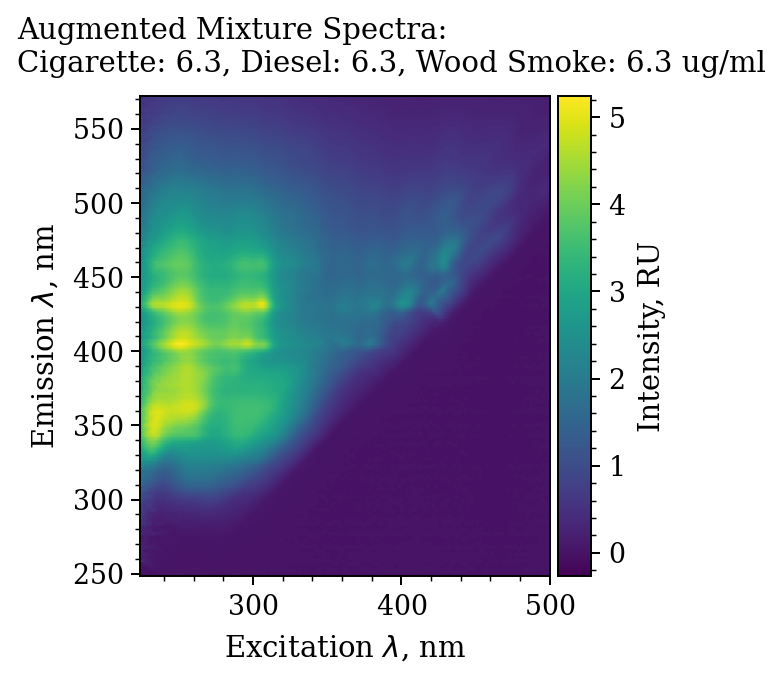

In [35]:
anim = pyeem.plots.mixture_animation(
    dataset,
    mix_results_df,
    plot_type="imshow",
    fig_kws={"dpi": 175},
    animate_kwargs={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())
#anim.save('mix.mp4', dpi=175)

In [ ]:
sources = list(dataset.calibration_sources.keys())
aug_results_df = pd.concat([ss_results_df, mix_results_df])
aug_df = []
for p in aug_results_df.index.get_level_values("hdf_path").unique().to_list():
    aug_df.append(pd.read_hdf(dataset.hdf, key=p))

aug_df = pd.concat(aug_df)

drop_indices = list(aug_df.index.names)
keep_indices = sources + ["source", "emission_wavelength"]
for keep in keep_indices:
    drop_indices.remove(keep)

X, y = [], []

aug_df.index = aug_df.index.droplevel(drop_indices)
for concentrations, eem_df in aug_df.groupby(sources + ["source"], as_index=False):
    drop_indices = list(eem_df.index.names)
    drop_indices.remove("emission_wavelength")
    eem_df.index = eem_df.index.droplevel(drop_indices)
    
    eem_np = eem_df.values
    eem_np = eem_np.reshape(eem_df.shape[0], eem_df.shape[1], 1)
    
    X.append(eem_np)
    y.append(concentrations[:-1])

print(np.array(X).shape)
print(np.array(y).shape)

## Create metadata template for future algal pigment measurements

In [ ]:
calibration_sources = ["chloropyhll", "phycocyanin", "fucoxanthin"]

pyeem.datasets.create_metadata_template("metadata_template.csv",
                                        calibration_sources=calibration_sources)

In [ ]:
import pandas as pd
pd.read_csv("metadata_template.csv")